__Теперь построим графики и попробуем подумать над связями между признаками, обозначиьь важность/бесполезность переменных__

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('hh_EDA_upd.csv')
df

,link,vacancy,company,city,experience,company_rating,working_hours,employee_location,wage_k
0,https://adsrv.hh.ru/click?b=1003372&place=35&m...,Водитель со своим грузовым автомобилем,ИП Петрикин Александр Вячеславович,Москва,0,4.5,Полная занятость,В офисе,180.0
1,https://adsrv.hh.ru/click?b=993174&place=36&me...,Консультант поддержки в Яндекс Путешествия,Яндекс Крауд: Поддержка,Москва,0,4.0,Полная занятость,Удалённая работа,30.0
2,https://hh.ru/vacancy/98672015?hhtmFrom=vacanc...,Менеджер по заполнению анкет (удаленно),ИП Кабин Дмитрий Владимирович,Москва,0,3.5,Полная занятость,Удалённая работа,36.8
3,https://hh.ru/vacancy/98657055?hhtmFrom=vacanc...,Ручной тестировщик (QA Manual Junior),Oxytocin,Москва,0,3.5,Полная занятость,В офисе,60.0
4,https://hh.ru/vacancy/93848299?utm_source=head...,Торговый представитель (Водитель-курьер),ЦУМ,Москва,1,4.0,Полная занятость,Сменный график,170.0
...,...,...,...,...,...,...,...,...,...
2072,https://hh.ru/vacancy/98610683?hhtmFrom=vacanc...,Кладовщик,ООО ЦУГАМ,Москва,1,2.0,Частичная занятость,В офисе,70.0
2073,https://hh.ru/vacancy/98627094?hhtmFrom=vacanc...,"Специалист по клиническим исследованиям, CRA, ...",ООО ЦУГАМ,Москва,1,2.0,Частичная занятость,В офисе,70.0
2074,https://hh.ru/vacancy/98631350?hhtmFrom=vacanc...,Официант в Кремль,ФГБУ Комбинат питания Кремлевский,Москва,3,2.0,Частичная занятость,В офисе,70.0
2075,https://hh.ru/vacancy/98673570?hhtmFrom=vacanc...,"Водитель с грузовым автомобилем, смена от 9000...",Центр Доставки,Москва,0,2.0,Частичная занятость,В офисе,160.0


На всякий случай продублируем __описание переменных:__
* `link` - ссылка на вакансию
* `vacancy` - должность
* `wage` - заявленная в объявлении зарплата(целевая переменная)
* `company` - работодатель
* `city` - город (бинарный признак: Москва/Другое)
* `experience` - требуемый опыт работы (0 - нет опыта, 1 - от 1 до 3 лет, 3 - о 3 до 6 лет, 6 - от 6 лет)
* `company_rating` - рейтинг работодателя на сайте hh.ru
* `working_hours` - занятость (бинарный признак: Полная/Частичная занятость)
* `employee_location` - формат/локация работы

In [18]:
var_cat = ['city', 'experience', 'working_hours', 'employee_location']
var_real = 'company_rating'
target = 'wage_k'

В прошлом разделе мы выяснили, что максимальное значение столдбца 'wage_k' равно 2000(то есть, 2 млн). Очевидно, это выбросы, которые подпортят нам как графики, так и метрики. Сразу заменим их на какое-нибудь среднее.

In [19]:
print(f"среднее: {df['wage_k'].mean()}, медиана: {df['wage_k'].median()}, мода: {df['wage_k'].mode()[0]}")

среднее: 117.64194800192585, медиана: 92.0, мода: 100.0


In [20]:
moda = df['wage_k'].mode()[0]
moda

100.0

Заменим значения на моду!

In [22]:
df['wage_k'] = df['wage_k'].map(lambda x: moda if x == 2000 else x)

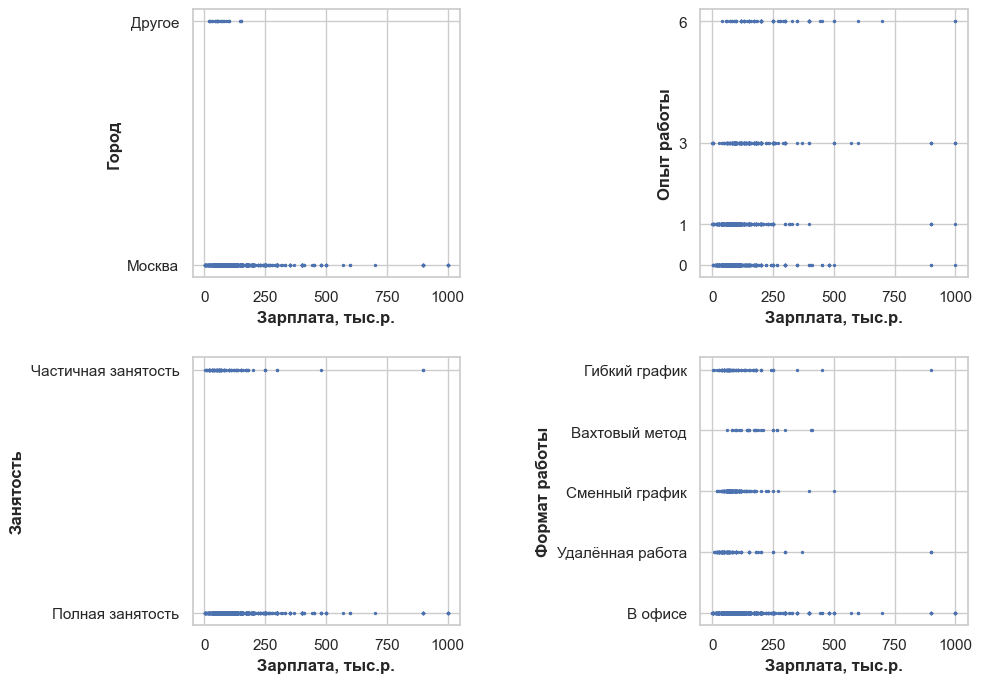

In [23]:
f, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=False)
y = ['Город', 'Опыт работы', 'Занятость', 'Формат работы']

for i, data, n in zip(ax.flatten(), var_cat, y):

    i.scatter(df[target], df[data], s=2)
    i.set_yticks(np.array(df[data].unique()))
    i.set_ylabel(n, fontsize=12, fontweight='bold')
    # i.tick_params(axis='y', rotation=)
    i.set_xlabel('Зарплата, тыс.р.', fontsize=12, fontweight='bold')

f.subplots_adjust(wspace=0.9, hspace=0.3)

__Наблюдения:__
1. В Москве предлагают бОльшие зарплаты, но напомним, что количество вакансий из других городов в десятки раз меньше московских, поэтому признак "город" не позволяет нам сделать какие-либо выводы.
2. График, построенный на основе опыта работы наглядно иллюстрирует взаимосвязь: чем больше опыт работы, тем чаще предлагают зарплату выше средней, хотя вакансии с каждым из признаков сосредоточены, в основном, в одном диапазоне: от 0 до 200 тыс. р., так что хочется еще покрутить этот признак.
3. Как и ожидалось, вакансии с Полной занятостью гарантируют более высокую зарплату. Также Полная занятость является предпочитаемым критерием со стороны работодателей - отсюда и большие цифры(бабки).
4. Как и в случае с предыдущим признаком, более традционный вариант - работа в офисе - гарантирует больший шанс найти работу(вакансий больше) и получать достойную зарплату: средняя зарплата в вакансиях с таким форматом явно выше, чем с другими

Text(0.5, 1.0, 'Взаимосвязь предложенной зарплаты и требуемого опыта работы')

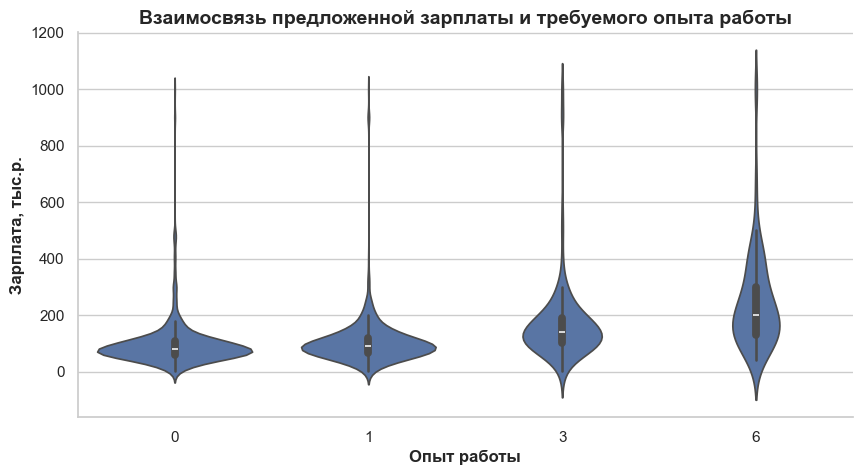

In [24]:
sns.set_theme(style='whitegrid', palette='deep')
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)
experience_wage = sns.violinplot(data=df, y='wage_k', x='experience')
plt.xlabel('Опыт работы', fontsize=12, fontweight='bold')
plt.ylabel('Зарплата, тыс.р.', fontsize=12, fontweight='bold')
plt.title('Взаимосвязь предложенной зарплаты и требуемого опыта работы', fontsize=14, fontweight='bold')


_Итак, что мы видим:_
1. Работодателям практически безразличны к опыту работы от 0 до 3 лет, когда устанавливают зп - элементы графика выглядят практически идентично.
2. Далее, работодатели, требующие наличие достаточно весомого опыта - от 3 до 6 лет - предлагают более широкий и высокий диапазон зарплат, среднее значение тоже заметно выше.
3. Последняя категория -  самые опытные работники - во-первых, могут выбирать из огромного диапазона зарплат, а во-вторых, в среднем получают зп на ~100% выше, чем работники с опытом от 0 до 3 лет

In [25]:
print(f"средняя зарплата при опыте работы от 0 до 3 лет: {round(df['wage_k'].loc[df['experience'] <= 1].mean())} тыс.р.")
print(f"средняя зарплата при опыте работы от 3 до 6 лет: {round(df['wage_k'].loc[df['experience'] == 3].mean())} тыс.р.")
print(f"средняя зарплата при опыте работы более 6 лет: {round(df['wage_k'].loc[df['experience'] == 6].mean())} тыс.р.")

средняя зарплата при опыте работы от 0 до 3 лет: 100 тыс.р.
средняя зарплата при опыте работы от 3 до 6 лет: 170 тыс.р.
средняя зарплата при опыте работы более 6 лет: 245 тыс.р.


Таким образом, напрашивается вывод, что средняя заработная плата находится в положительной линейной зависимости от опыта работы. 

Кстати, мы еще не посмотрели на рейтинг компании, предлагаю это исправить!

Text(0.5, 1.0, 'Гистограмма рейтинга работодателей')

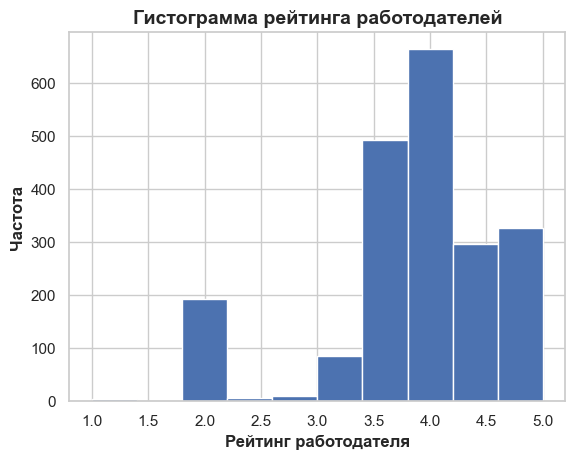

In [26]:
plt.hist(df['company_rating'])
plt.xlabel('Рейтинг работодателя', fontsize=12, fontweight='bold')
plt.ylabel('Частота', fontsize=12, fontweight='bold')
plt.title('Гистограмма рейтинга работодателей', fontsize=14, fontweight='bold')

Видим, что у компаний рейтинг по большей части выше среднего, идем дальше

Text(0.5, 1.0, 'Взаимосвязь зарплат и рейтингов работодателей')

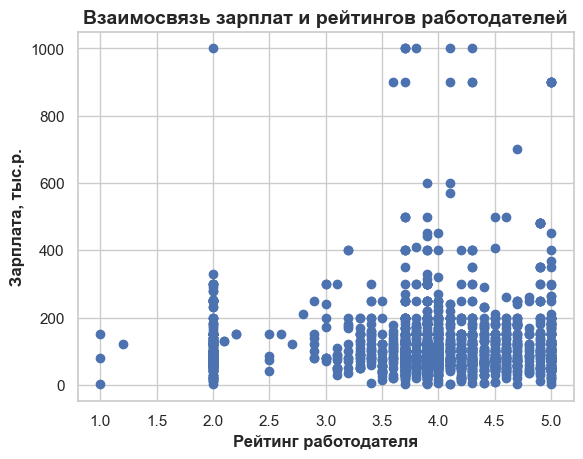

In [27]:
plt.scatter(data=df, y='wage_k', x='company_rating')
plt.xlabel('Рейтинг работодателя', fontsize=12, fontweight='bold')
plt.ylabel('Зарплата, тыс.р.', fontsize=12, fontweight='bold')
plt.title('Взаимосвязь зарплат и рейтингов работодателей', fontsize=14, fontweight='bold')

Заметно большое количество зарплат выше среднего, предложенных компаниями с рейтингом 2.0 - интересно подумать над обманом на рынке труда. Ну а в целом, компании с положительным рейтингом предлагают зарплаты примерно в одном диапазоне, а при повышении рейтинга наблюдается увеличение количества отклонений в большую сторону - приятная и ожидаемая тенденция.

In [28]:
print(f"средняя зарплата, предложенная работодателями с рейтингом ниже 2.0: {round(df['wage_k'].loc[df['company_rating'] <= 2].mean())} тыс.р.")
print(f"средняя зарплата, предложенная работодателями с рейтингом выше 4.0: {round(df['wage_k'].loc[df['company_rating'] >= 4].mean())} тыс.р.")

средняя зарплата, предложенная работодателями с рейтингом ниже 2.0: 109 тыс.р.
средняя зарплата, предложенная работодателями с рейтингом выше 4.0: 125 тыс.р.


На графиках стали заметны единичные значения зарплаты от 600k, мы решили заменить и их на моду, чтобы данные были более приблиденными к реальности.

In [30]:
df['wage_k'] = df['wage_k'].map(lambda x: moda if x >= 600 else x)
df.to_csv('hh_clean.csv', index=False)